In [1]:
%matplotlib inline
import sys
sys.path.append("..")
import numpy as np
from matplotlib import pyplot as plt
import igraph

import pythd

In [2]:
# Function to create a dataset of a circle at a given point
def create_circle(c=np.array([0.0, 0.0]), r=1.0, noise=0.0, n=20):
    delta = 2.0*np.pi / n
    theta = np.linspace(0.0, 2.0*np.pi, num=n, endpoint=False)
    c = np.array(c)
    
    x = c[0] + r*np.cos(theta) + np.random.normal(scale=noise, size=theta.shape)
    y = c[1] + r*np.sin(theta) + np.random.normal(scale=noise, size=theta.shape)
    return np.array([x, y]).T

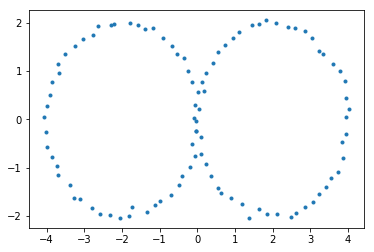

In [24]:
# Create and show two circles with some noise
circ1 = create_circle(c=[-2.0, 0.0], r=2.0, noise=0.05, n=50)
circ2 = create_circle(c=[2.0, 0.0], r=2.0, noise=0.05, n=50)
dataset = np.concatenate((circ1, circ2))
plt.plot(dataset[:, 0], dataset[:, 1], ".")
plt.show()

In [25]:
# Setup MAPPER
filt = pythd.filter.ComponentFilter(0) # filter: x component
xmin = dataset[:, 0].min()
xmax = dataset[:, 0].max()
cover = pythd.cover.IntervalCover1D.EvenlySpaced(10, xmin, xmax, 0.5)
clustering = pythd.clustering.HierarchicalClustering()

In [26]:
# Run MAPPER
mapper = pythd.mapper.MAPPER(filter=filt, cover=cover, clustering=clustering)
nodes, edges = mapper.compute_1_skeleton(dataset)

In [27]:
# Create igraph graph
g = igraph.Graph()
for vid, points in nodes.items():
    g.add_vertex(name=vid, points=points)
g.add_edges(edges)
print(g)

IGRAPH UN-- 16 17 --
+ attr: name (v), points (v)
+ edges (vertex names):
0--2, 0--6, 1--2, 1--5, 2--3, 2--4, 3--14, 4--15, 5--8, 6--7, 7--9, 8--9,
9--10, 11--12, 11--13, 12--14, 13--15


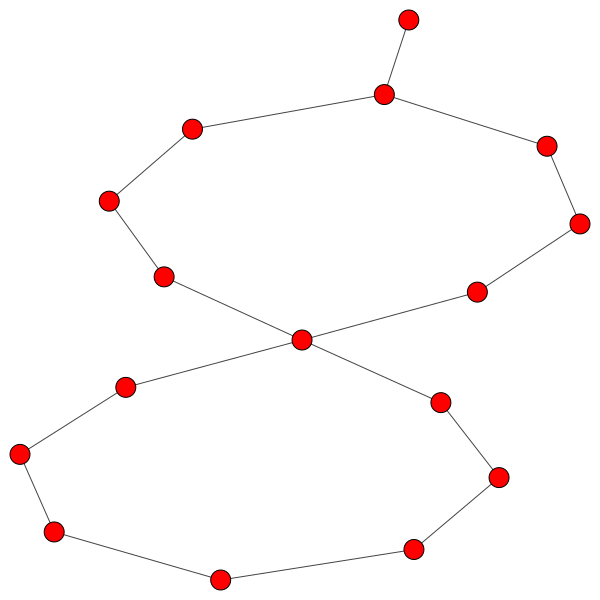

In [28]:
# Visualize the graph
layout = g.layout_kamada_kawai()
igraph.plot(g, layout=layout)